### 1) Library 불러오기

In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


### 2) Hyper Parameter 세팅하기

In [182]:
# hypter parameter setting
learning_rate = 0.02
training_epochs = 30
display_step = 10
batch_size = 256
weight_decay = 1e-5
# drop_prob = 0.3
momentum = 0.9 # momentum: 이전의 Gradient 정보 반영

activation = nn.ReLU()
bn = torch.nn.BatchNorm2d
# dropout = torch.nn.Dropout(p = drop_prob)
max_pool = nn.MaxPool2d(2,2) # kerel size, stride size, padding size 

### 3) Data 불러와서 전처리하기

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


len(train_data):  50000
len(test_data):  10000
data tensor([[[-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         ...,
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214]],

        [[-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         ...,
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214]],

        [[-1.4598, -1.4742, -1.3825],
         [-1.1109, -1.3562, -1.4020],
         [-0.5293, -0.9826, -1.2069],
         ...,
         [ 0.4399,  0.0204, -0.2118],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214]],

        ...,

        [[ 0.8276, -0.0189, -1.8507],
         [ 0.4981, -0.2352, -1.5385],
         [ 0.1104, -0.6876, -1.5580],
         ...,
         [-1.0527, -1.4742, -1.7141],
         [-2.4291, -2.4183, -2.2214]

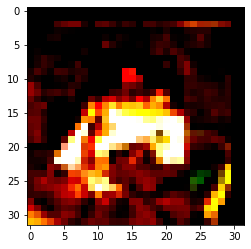

In [183]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_data = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, shuffle=True, num_workers=2, drop_last = True)

test_data = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, shuffle=False, num_workers=2, drop_last = True)


# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
x_train = np.transpose(x_train, (1, 2, 0))

print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


data shape: torch.Size([256, 3, 32, 32])
label: tensor([9, 4, 6, 0, 8, 0, 4, 9, 1, 1, 8, 9, 3, 4, 3, 4, 7, 3, 8, 3, 2, 9, 0, 2,
        2, 2, 3, 4, 7, 2, 0, 5, 4, 3, 5, 5, 2, 9, 5, 8, 2, 1, 6, 2, 5, 7, 2, 6,
        6, 9, 2, 2, 2, 1, 5, 8, 5, 8, 7, 4, 2, 8, 9, 2, 7, 0, 7, 6, 5, 4, 1, 6,
        7, 9, 5, 2, 7, 7, 0, 4, 1, 9, 1, 2, 3, 4, 6, 2, 2, 5, 3, 5, 0, 8, 9, 0,
        1, 3, 7, 4, 6, 7, 6, 7, 8, 1, 3, 3, 6, 1, 3, 3, 4, 1, 5, 0, 3, 5, 4, 0,
        5, 8, 5, 8, 2, 9, 9, 2, 2, 1, 5, 6, 6, 1, 7, 2, 8, 6, 5, 2, 3, 4, 2, 7,
        1, 8, 7, 3, 9, 4, 8, 2, 0, 2, 6, 4, 7, 6, 6, 5, 6, 6, 6, 8, 8, 8, 7, 0,
        2, 6, 6, 0, 7, 0, 4, 3, 8, 3, 6, 6, 8, 9, 2, 9, 7, 9, 8, 0, 2, 3, 4, 2,
        5, 8, 2, 5, 4, 5, 2, 4, 5, 1, 6, 7, 1, 6, 8, 0, 0, 2, 5, 3, 2, 5, 8, 1,
        5, 7, 1, 8, 1, 2, 3, 6, 7, 7, 5, 1, 9, 6, 8, 1, 8, 7, 1, 5, 9, 1, 3, 3,
        6, 5, 4, 4, 0, 1, 3, 1, 2, 5, 2, 9, 3, 4, 6, 2])


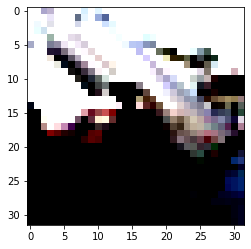

In [184]:
# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

check_image = example_data[0]
check_image = np.transpose(check_image, (1, 2, 0))

plt.figure()
plt.imshow(check_image)
plt.show()

### 4) Model 만들기, 최적화 함수와 오차 함수 적용하기

In [185]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() # for initializing nn.Module (parent class)
        self.feature_extraction = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding = 1),
            activation,
            nn.Conv2d(64, 64, 3),
            bn(64),
            # 30

            
            nn.Conv2d(64, 128, 3, padding = 1),
            activation,
            nn.Conv2d(128, 128, 3),
            activation,
            max_pool,
            bn(128),
            # 28
            # 14
            

            nn.Conv2d(128, 256, 3, padding = 1),
            activation,
            nn.Conv2d(256, 256, 3),
            activation,
            nn.Conv2d(256, 256, 3),
            activation,
            max_pool,
            bn(256),
            # 14
            
            
            nn.Conv2d(256, 512, 3, padding = 1),
            activation,
            nn.Conv2d(512, 512, 3),
            activation,
            nn.Conv2d(512, 512, 3),
            activation,
            bn(512),
            
            
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 10),
            activation,
            nn.Linear(10, 10)
        )

    def forward(self, x):
        extracted_feature = self.feature_extraction(x) 
        flatten = extracted_feature.view(batch_size, -1) 
        result = self.classifier(flatten)
        return result


model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9, weight_decay = 1e-5)

### 5) Train & Test

In [ ]:
loss_array = []

# train the model
for i in range(training_epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())

0 epoch loss: 1.1682085990905762
10 epoch loss: 0.2866082489490509
20 epoch loss: 0.16356109082698822


In [ ]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [ ]:
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))